In [2]:
import torch

In [3]:
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])

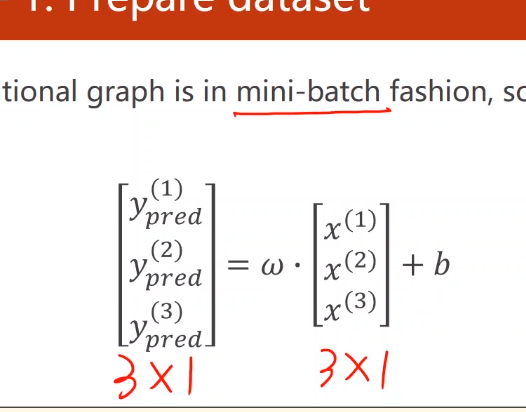

构造计算图
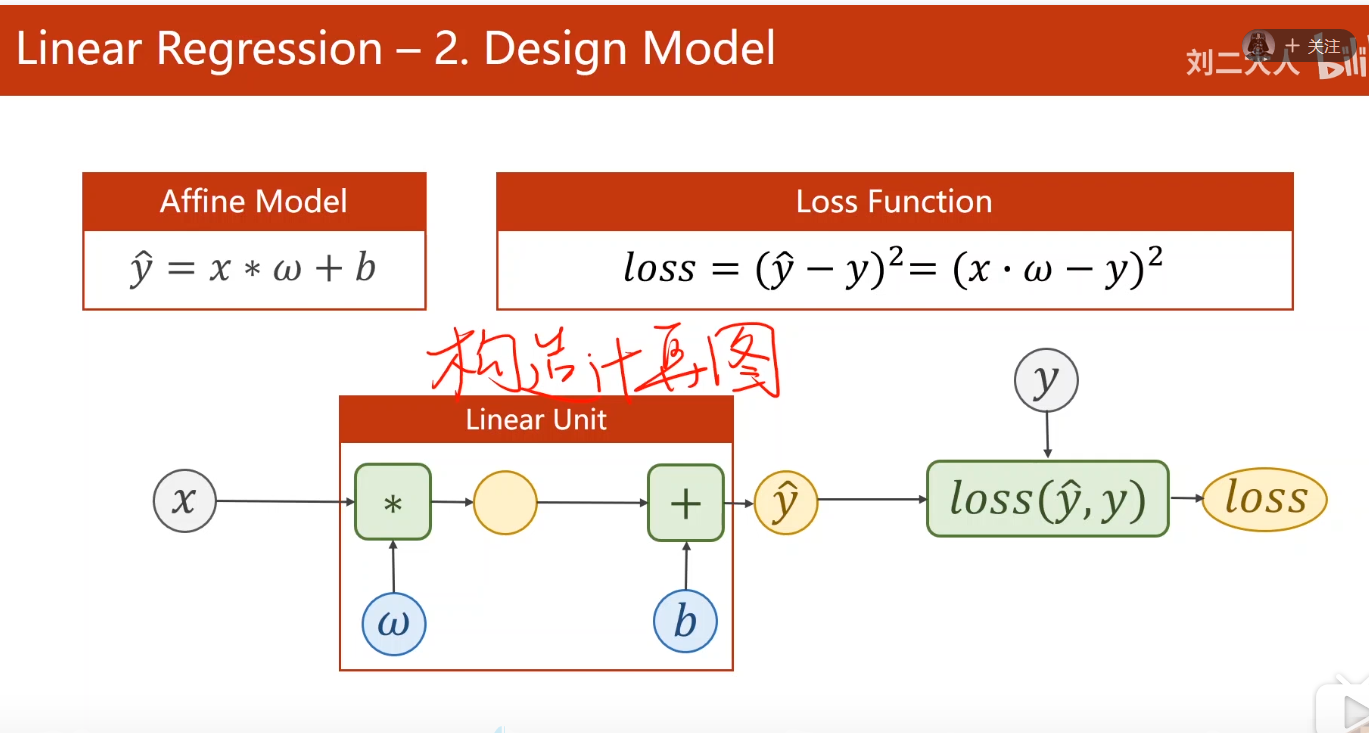

#### 模型定义
以下两种式子等价，只是一个全部都转置了而已
$$
y = xw+b\\
y = w^Tx+b
$$
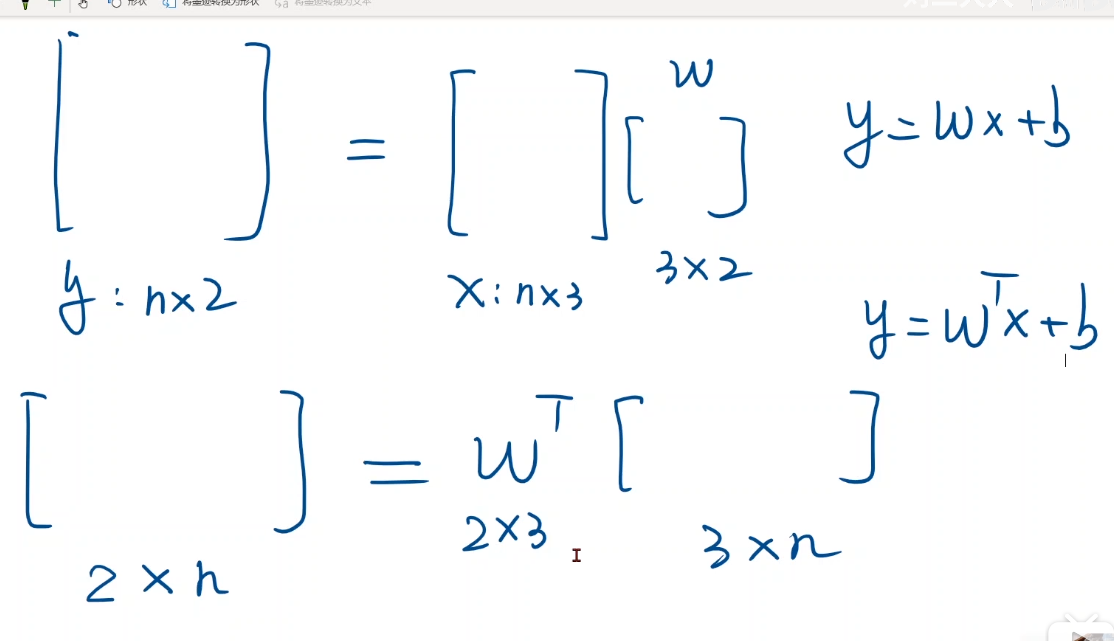

In [12]:
class LinearModel(torch.nn.Module):
    # 默认初始化必须定义
    def __init__(self):
        # 调用父类构造 必写
        super(LinearModel, self).__init__()
        # 构造Linear对象  包括了权重和偏置
        # nn neural network
        # Linear(in_features, out_features,boas=True)  y = Ax+b
        self.linear = torch.nn.Linear(1,1)
    # 前馈
    def forward(self, x):
        # 实现了一个可调用的对象 
        # *args 将参数转换为元组  **kwargs将参数转换为字典 
        y_pred = self.linear(x)
        return y_pred

In [13]:
model = LinearModel()

### 构造损失函数与优化器
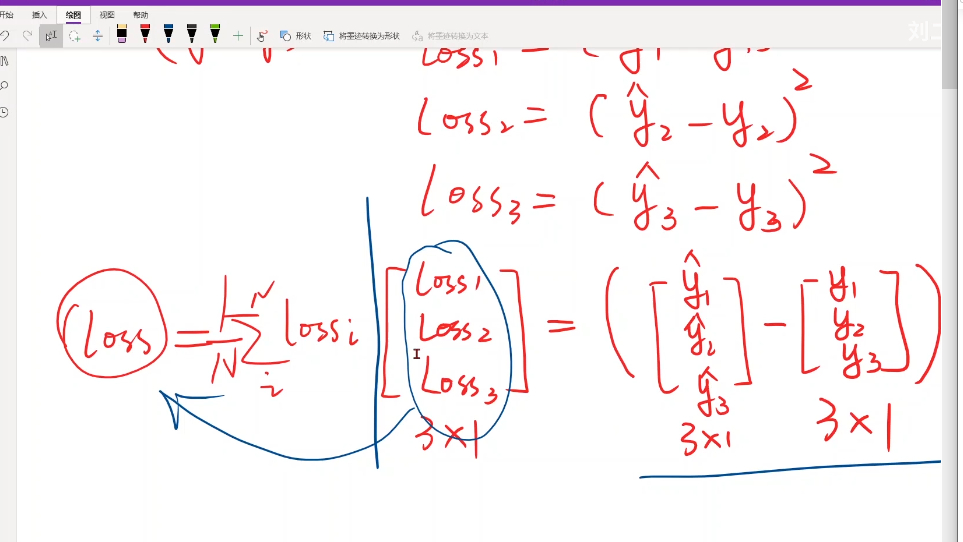

MSE和SGD

In [14]:
# 损失是否求均值
criterion = torch.nn.MSELoss(size_average=False)

D:\Python\Python36\Lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [15]:
# model里面的所有权重
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

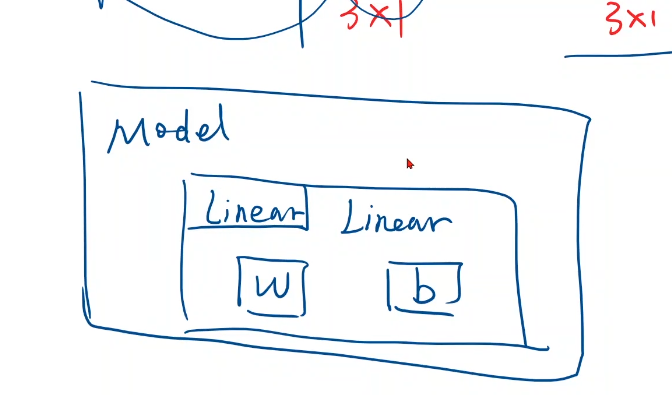

In [19]:
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss)
    # 梯度需要清零
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 tensor(128.2502, grad_fn=<MseLossBackward>)
1 tensor(57.0985, grad_fn=<MseLossBackward>)
2 tensor(25.4237, grad_fn=<MseLossBackward>)
3 tensor(11.3229, grad_fn=<MseLossBackward>)
4 tensor(5.0456, grad_fn=<MseLossBackward>)
5 tensor(2.2510, grad_fn=<MseLossBackward>)
6 tensor(1.0069, grad_fn=<MseLossBackward>)
7 tensor(0.4529, grad_fn=<MseLossBackward>)
8 tensor(0.2063, grad_fn=<MseLossBackward>)
9 tensor(0.0964, grad_fn=<MseLossBackward>)
10 tensor(0.0474, grad_fn=<MseLossBackward>)
11 tensor(0.0256, grad_fn=<MseLossBackward>)
12 tensor(0.0158, grad_fn=<MseLossBackward>)
13 tensor(0.0113, grad_fn=<MseLossBackward>)
14 tensor(0.0093, grad_fn=<MseLossBackward>)
15 tensor(0.0083, grad_fn=<MseLossBackward>)
16 tensor(0.0079, grad_fn=<MseLossBackward>)
17 tensor(0.0076, grad_fn=<MseLossBackward>)
18 tensor(0.0074, grad_fn=<MseLossBackward>)
19 tensor(0.0073, grad_fn=<MseLossBackward>)
20 tensor(0.0071, grad_fn=<MseLossBackward>)
21 tensor(0.0070, grad_fn=<MseLossBackward>)
22 tensor(0.006

In [21]:
print('w = ', model.linear.weight.item())
print('b =',model.linear.bias.item())



w =  1.9682872295379639
b- 0.07209040969610214


In [23]:
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y pred =',y_test.data)

y pred = tensor([[7.9452]])
